In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

5. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df.

Take a look at the first 10 rows.

Look at the last 5 rows. Do you see a problem?

Redo the read_csv() call to correct this issue - do not modify the original csv file.

In [2]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN
6729,footnoteSeqID,Footnote,NaN,NaN
6730,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [5]:
gdp_df = gdp_df[:-2] #Drop last two rows

In [6]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


6. Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   object 
 2   Value            6729 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), object(2)
memory usage: 210.4+ KB


In [8]:
gdp_df.drop(columns = "Value Footnotes") # also gdp_df.drop('Value Footnotes', axis = 1)

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
...,...,...,...
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849


In [9]:
gdp_df.head() # changes above didn't save; assign to gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN


In [10]:
gdp_df = gdp_df.drop(columns = "Value Footnotes")

In [11]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [12]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6729 non-null   object 
 1   Year             6729 non-null   object 
 2   Value            6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


In [13]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [14]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


In [15]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   object 
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), object(2)
memory usage: 157.8+ KB


7. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it

-gdp_df has 6729 rows and 3 columns

-the data types are "objects" and floats (numeric values)

-now I need to fix the data vaguely stored as objects

In [16]:
gdp_df["Year"] = pd.to_numeric(gdp_df["Year"])

In [17]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   object 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [18]:
gdp_df.shape # provides number of rows and then columns

(6729, 3)

In [19]:
gdp_df.Country.value_counts() # value counts for this column

Macao SAR, China             29
Tonga                        29
Switzerland                  29
Guatemala                    29
Honduras                     29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

8: Which years are represented in this dataset? 
-The years range from 2004 to 2018

Take a look at the number of observations per year. What do you notice?
-There are missing data for some years

In [20]:
gdp_df.Year.describe()

count    6729.000000
mean     2004.293357
std         8.269834
min      1990.000000
25%      1997.000000
50%      2004.000000
75%      2011.000000
max      2018.000000
Name: Year, dtype: float64

In [21]:
gdp_df.Year.value_counts()

2011    243
2012    241
2009    241
2010    241
2013    241
2015    240
2008    240
2014    240
2007    239
2016    239
2017    239
2005    238
2004    238
2002    238
2006    238
2003    238
2001    237
2000    236
1999    228
1998    227
2018    226
1997    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Year, dtype: int64

9. How many countries are represented in this dataset? 

There are 243 countries represented in the dataset

Which countries are least represented in the dataset? Why do you think these countries have so few observations?

The following 20 countries are the least represented in the dataset:
Montenegro                   22
San Marino                   21
Cayman Islands               20
Eritrea                      20
Libya                        20
Palau                        19
Timor-Leste                  19
CuraÃ§ao                     19
Liberia                      19
Qatar                        19
Kosovo                       19
Other small states           19
Small states                 19
SÃ£o TomÃ© and Principe      18
Afghanistan                  17
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1



In [22]:
# of countries in dataset
unique_countries = gdp_df.drop_duplicates(subset="Country")

In [23]:
unique_countries["Country"].value_counts()

Tonga                                            1
Europe & Central Asia (excluding high income)    1
Sub-Saharan Africa                               1
Seychelles                                       1
Moldova                                          1
                                                ..
Micronesia                                       1
Turkmenistan                                     1
Indonesia                                        1
Botswana                                         1
Colombia                                         1
Name: Country, Length: 243, dtype: int64

In [24]:
gdp_df.Country.value_counts().tail(20) # tail lets you see the bottom values

Montenegro                   22
San Marino                   21
Libya                        20
Cayman Islands               20
Eritrea                      20
Liberia                      19
Kosovo                       19
Small states                 19
Other small states           19
CuraÃ§ao                     19
Qatar                        19
Palau                        19
Timor-Leste                  19
SÃ£o TomÃ© and Principe      18
Afghanistan                  17
Nauru                        12
Sint Maarten (Dutch part)     9
South Sudan                   8
Turks and Caicos Islands      8
Djibouti                      1
Name: Country, dtype: int64

10. Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [25]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [26]:
gdp_2014

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555
...,...,...,...
6592,West Bank and Gaza,2014,4445.307470
6617,World,2014,14514.392218
6646,Yemen,2014,3828.484887
6675,Zambia,2014,3684.685507


11. Use .describe() to find the summary statistics for GDP per capita in 2014.

In [27]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


12. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

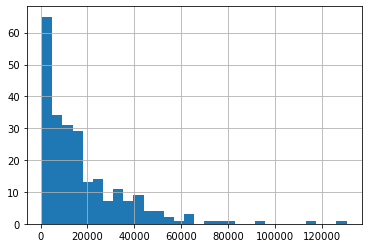

In [28]:
# semicolon gets rid of gibberish at top
gdp_2014['GDP_Per_Capita'].hist(bins=30);

Distribution is positively skewed

13. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

Bottom 5 Countries:
Central African Republic, Burundi, Democratic Republic of Congo, Niger, Malawi

Top 5 Countries:
Brunei, Singapore, Luxembourg, Qatar, China

In [29]:
gdp_2014.sort_values(by='GDP_Per_Capita', ascending=True)

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


14. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [30]:
# gdp_pivoted = gdp_df.pivot_table(values='GDP_Per_Capita', index='Country')
gdp_pivoted = gdp_df[gdp_df['Year'].isin([1990, 2017])].pivot_table(values='GDP_Per_Capita', index='Country', columns='Year').dropna()

In [31]:
gdp_pivoted.head()

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104


15. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [32]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

In [33]:
gdp_pivoted.head()

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972


16. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

20 countries

In [34]:
Neg_Percent_Change = gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]
len(Neg_Percent_Change.index) # .index returns row names; len counts these row names 

20

17. Which country had the highest % change in GDP per capita? 

Equitorial Guinea had the highest % change in GDP per capita

Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?

Bonus: Put both line charts on the same plot.

In [35]:
gdp_pivoted.sort_values(by='Percent_Change', ascending=False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1017.764136,22298.942144,2090.973464
China,1521.963868,15253.993071,902.257241
Myanmar,730.228038,5610.324700,668.297629
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
...,...,...,...
Ukraine,10463.959955,7906.540301,-24.440266
Yemen,3425.707169,2404.422370,-29.812379
Burundi,1027.396660,670.777072,-34.710993


In [36]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834


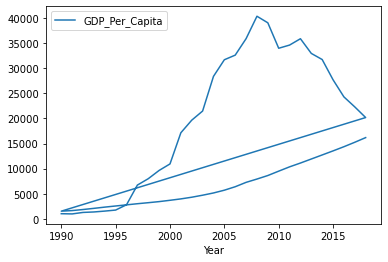

In [37]:
gdp_df[gdp_df['Country'].isin(['Equatorial Guinea', 'China'])].plot.line(x = 'Year', y = 'GDP_Per_Capita')

This line looks crazy. Let's try something else

In [38]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
...,...,...,...
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849


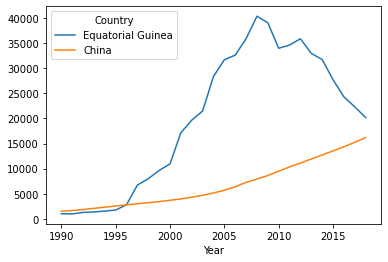

In [39]:
gdp_df.pivot_table(values='GDP_Per_Capita', index='Year', columns='Country').reset_index().plot.line(x='Year', y=['Equatorial Guinea', 'China'])
# reset_index resets index to range from 0-i; treats existing index as a column

Much better! The percent change in GDP for China has been steady since 1990, but the percent change in GDP for Equatorial Guinea has spiked and fallen somewhat dramatically over the past 40 years.

18. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [40]:
continents = pd.read_csv("../data/continents.csv")

In [41]:
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


19. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [42]:
gdp_df = gdp_df.merge(continents, on='Country')

In [43]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia
...,...,...,...,...
5329,Zimbabwe,1994,2768.309953,Africa
5330,Zimbabwe,1993,2572.870395,Africa
5331,Zimbabwe,1992,2591.007534,Africa
5332,Zimbabwe,1991,2906.272849,Africa


20. Determine the number of countries per continent. Create a bar chart showing this.

In [44]:
gdp_df.groupby('Continent').Country.nunique()

Continent
Africa           51
Asia             44
Europe           45
North America    26
Oceania          14
South America    12
Name: Country, dtype: int64

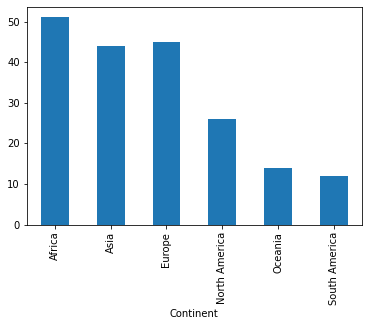

In [45]:
gdp_df.groupby('Continent').Country.nunique().plot(kind="bar")
# nunique() gives unique count

21. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [46]:
gdp_2014_update = gdp_df[gdp_df['Year'] == 2014]

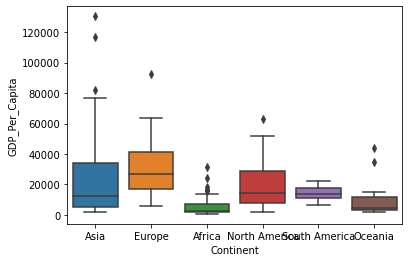

In [47]:
sns.boxplot(x='Continent', y='GDP_Per_Capita', data=gdp_2014_update)

The IQR for Asia is much wider than most. There are quite a few outliers for countries in Africa.

22. Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [48]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows=4495)

In [49]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [50]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


23. Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [51]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


In [52]:
internet_df = internet_df.drop(columns = "Value Footnotes")

In [53]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [54]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})

In [55]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


24. How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.  

This new dataset has 4495 rows and 3 columns

In [56]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [57]:
internet_df[internet_df['Internet_Users_Pct'] > 0].max() 
# returns largest values for each column (but not necessarily the same row)

Country               Zimbabwe
Year                      2014
Internet_Users_Pct       98.16
dtype: object

In [58]:
internet_df[internet_df['Internet_Users_Pct'] > 0]['Year'].min()

1990

In [59]:
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year').head(50)

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
3874,Switzerland,1990,0.595714
2217,Korea (Rep. of),1990,0.023265
3040,Norway,1990,0.707299
2095,Japan,1990,0.020294
3849,Sweden,1990,0.584192


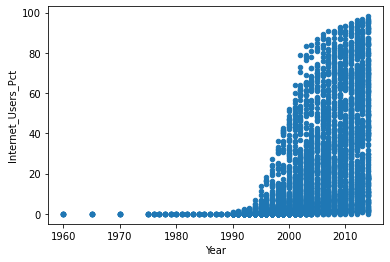

In [64]:
internet_df.plot(kind = 'scatter', x = 'Year', y = 'Internet_Users_Pct');
# gdp_df[gdp_df['Country'].isin(['Equatorial Guinea', 'China'])].plot.line(x = 'Year', y = 'GDP_Per_Capita')

26. Merge gdp_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.  
Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

In [65]:
gdp_and_internet_use = gdp_df.merge(internet_df, on = ['Country', 'Year'])

In [66]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


27. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [67]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


Looks good!

28. Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the mean internet users percentage in 2014? How many countries have at least 90% internet users in 2014?

In [69]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
# gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [70]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00


In [72]:
gdp_and_internet_use_2014['Internet_Users_Pct'].mean()
# internet_df[internet_df['Internet_Users_Pct'] > 0]['Year'].min()

44.673536463414635

In [76]:
len(gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90])

12

In [77]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90]

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
228,Bahrain,2014,43846.568554,Asia,90.99998
854,Denmark,2014,45057.083449,Europe,95.99000
1067,Finland,2014,39301.058763,Europe,92.38000
1395,Iceland,2014,42774.888849,Europe,98.16000
1578,Japan,2014,37337.317406,Asia,90.58000
1812,Luxembourg,2014,92349.186429,Europe,94.67000
2199,Netherlands,2014,46238.209707,Europe,93.17000
2310,Norway,2014,63328.259526,Europe,96.30000
2556,Qatar,2014,116693.507701,Asia,91.49000
2992,Sweden,2014,44762.490296,Europe,92.52000


The mean internet users percentage in 2014 is 44.67%. 12 countries have at least 90% internet users in 2014.

29. Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. Each individual figure in the facet grid will represent a single country. What trends do you notice? [Note: Create a FacetGrid for the three countries.]  

Qatar, Luxembourg, and Singapore had the top 3 largest GDP per capita figures for 2014.

In [79]:
gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending = False).head()
# internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year').head(50)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00
1685,Kuwait,2014,72588.670676,Asia,78.70
2310,Norway,2014,63328.259526,Europe,96.30


In [88]:
gdp_and_internet_use_2014_grid = gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending = False).head(3)

In [89]:
# look at gdp_and_internet_use for Qatar, Luxembourg, and Singapore; graph all three for all years


Int64Index([2556, 1812, 2765], dtype='int64')

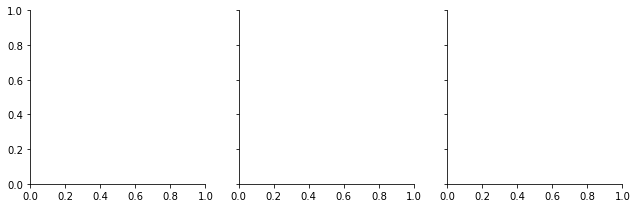

In [87]:
x = sns.FacetGrid(gdp_and_internet_use_2014_grid, col = 'Country', row = 'Year');
x.map(sns.scatterplot, 'Internet_Users_Pct');